Análisis EDA Adidas
Perspectiva del Análisis: marketing y creación de estrategia de crecimiento. Este EDA se centra en la perspectiva de marketing para identificar oportunidades de crecimiento.


In [6]:
#Paso 1: importar librerias 
import seaborn as sns
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os
import warnings


warnings.filterwarnings('ignore')
sns.set_style("whitegrid")
%matplotlib inline
plt.rcParams['figure.figsize'] = (6, 4)


In [7]:
#Paso 2: Descargar datos desde Kaggle
import kagglehub

# Download latest version
path = kagglehub.dataset_download("davidmashishi/adidas-shoes-sales")

print("Path to dataset files:", path)

Path to dataset files: /Users/maribelgutierrezramirez/.cache/kagglehub/datasets/davidmashishi/adidas-shoes-sales/versions/1


In [8]:
file_name = "Adidas Shoe Sales.csv"
file_path = os.path.join(path, file_name)

In [9]:
#Paso 3 Explorar datos: Llamar el encabezado de la tabla

# Verificar los archivos disponibles en el directorio
print("Archivos en el directorio:", os.listdir(path))

# Cargar el archivo CSV usando el nombre correcto
# Reemplaza 'adidas_sales.csv' por el nombre correcto si es diferente
csv_files = [f for f in os.listdir(path) if f.endswith('.csv')]
if csv_files:
	data = pd.read_csv(os.path.join(path, csv_files[0]))
	display(data.head())
else:
	print("csv No encontrado")

Archivos en el directorio: ['Adidas Shoe Sales.csv']


,Retailer,Retailer_ID,Invoice_Date,Region,State,City,Product,Price_per_Unit,Unit_Sold,Total_Sales,Operating_Profit,Sales_Method
0,Sports Direct,1197831,8/25/2021,South,Alabama,Birmingham,Men Street Footwear,$10.00,700,"7,000","$3,150",Outlet
1,West Gear,1185732,9/12/2021,West,Utah,Salt Lake City,Women Street Footwear,$10.00,350,"3,500","$1,225",In-store
2,Walmart,1197831,3/19/2021,South,Arkansas,Little Rock,Women Street Footwear,$10.00,350,"3,500","$1,400",Online
3,West Gear,1185732,9/12/2021,West,Utah,Salt Lake City,Women Athletic Footwear,$10.00,325,"3,250","$1,300",In-store
4,West Gear,1197831,3/19/2021,South,Oklahoma,Oklahoma City,Women Street Footwear,$10.00,275,"2,750","$1,100",Online


In [10]:
#Paso 4: Identificar ¿qué debo limpiar?
df = pd.read_csv(file_path)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9641 entries, 0 to 9640
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Retailer          9641 non-null   object
 1   Retailer_ID       9641 non-null   int64 
 2   Invoice_Date      9641 non-null   object
 3   Region            9641 non-null   object
 4   State             9641 non-null   object
 5   City              9641 non-null   object
 6   Product           9641 non-null   object
 7   Price_per_Unit    9639 non-null   object
 8   Unit_Sold         9641 non-null   object
 9   Total_Sales       9641 non-null   object
 10  Operating_Profit  9641 non-null   object
 11  Sales_Method      9641 non-null   object
dtypes: int64(1), object(11)
memory usage: 904.0+ KB


Paso 5: Limpieza de datos

In [ ]:
 
#Limpiar Price per Unit
df['Price_per_Unit'] = df['Price_per_Unit'].str.replace('$', '').str.replace(',', '').astype(float)
df['Price_per_Unit'] = df['Price_per_Unit'].fillna(df['Price_per_Unit'].mean())

In [12]:
#Limpiar Unit sold
df['Unit_Sold'] = df['Unit_Sold'].str.replace(',', '').astype(int)

In [13]:
#Limpiar total sales y Operating Prof
df['Total_Sales'] = df['Total_Sales'].str.replace('$', '').str.replace(',', '').astype(int)
df['Operating_Profit'] = df['Operating_Profit'].str.replace('$', '').str.replace(',', '').astype(int)

In [14]:
#Verificar limpieza
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9641 entries, 0 to 9640
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Retailer          9641 non-null   object 
 1   Retailer_ID       9641 non-null   int64  
 2   Invoice_Date      9641 non-null   object 
 3   Region            9641 non-null   object 
 4   State             9641 non-null   object 
 5   City              9641 non-null   object 
 6   Product           9641 non-null   object 
 7   Price_per_Unit    9641 non-null   float64
 8   Unit_Sold         9641 non-null   int64  
 9   Total_Sales       9641 non-null   int64  
 10  Operating_Profit  9641 non-null   int64  
 11  Sales_Method      9641 non-null   object 
dtypes: float64(1), int64(4), object(7)
memory usage: 904.0+ KB


Las 9641 casillas tienen valores. Ahora miremos el tipo de dato de cada columna

In [15]:
#Convertir columnas a Category
df['Sales_Method'] = df['Sales_Method'].astype('category')
df['Region'] = df['Region'].astype('category')
df['State'] = df['State'].astype('category')
df['City'] = df['City'].astype('category')
df['Product'] = df['Product'].astype('category')
df['Invoice_Date'] = pd.to_datetime(df['Invoice_Date'])

In [16]:
#Revisar de nuevo 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9641 entries, 0 to 9640
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Retailer          9641 non-null   object        
 1   Retailer_ID       9641 non-null   int64         
 2   Invoice_Date      9641 non-null   datetime64[ns]
 3   Region            9641 non-null   category      
 4   State             9641 non-null   category      
 5   City              9641 non-null   category      
 6   Product           9641 non-null   category      
 7   Price_per_Unit    9641 non-null   float64       
 8   Unit_Sold         9641 non-null   int64         
 9   Total_Sales       9641 non-null   int64         
 10  Operating_Profit  9641 non-null   int64         
 11  Sales_Method      9641 non-null   category      
dtypes: category(5), datetime64[ns](1), float64(1), int64(4), object(1)
memory usage: 579.9+ KB


Exploración de Datos Numéricos


In [17]:
df.describe()

,Retailer_ID,Invoice_Date,Price_per_Unit,Unit_Sold,Total_Sales,Operating_Profit
count,9.641000e+03,9641,9641.000000,9641.000000,9641.000000,9641.000000
mean,1.173851e+06,2021-05-10 17:09:06.291878656,45.212159,256.779483,9316.467898,3439.278498
min,1.128299e+06,2020-01-01 00:00:00,7.000000,0.000000,0.000000,0.000000
25%,1.185732e+06,2021-02-17 00:00:00,35.000000,106.000000,425.000000,192.000000
50%,1.185732e+06,2021-06-04 00:00:00,45.000000,176.000000,957.000000,437.000000
75%,1.185732e+06,2021-09-16 00:00:00,55.000000,350.000000,15000.000000,5200.000000
max,1.197831e+06,2021-12-31 00:00:00,110.000000,1275.000000,82500.000000,39000.000000
std,2.635869e+04,NaN,14.703484,214.117101,14182.917947,5417.539167


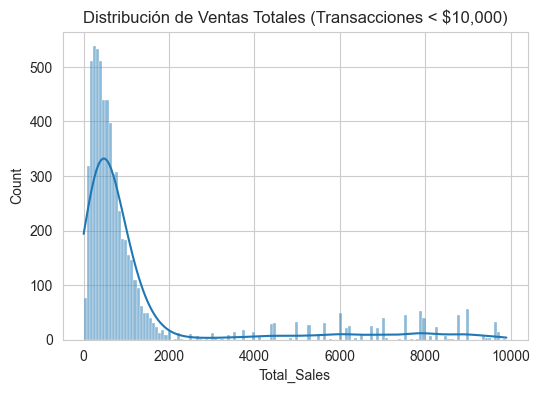

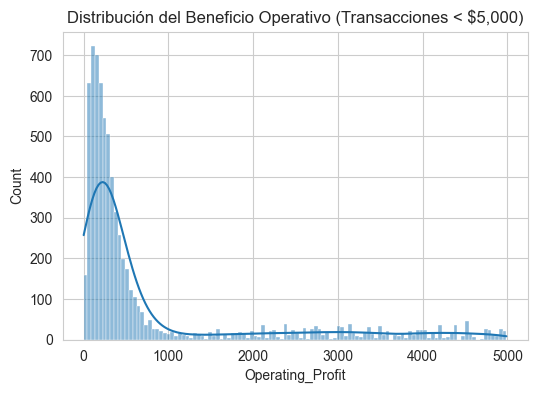

In [18]:
#Distribución de variables 

# Filtra el DataFrame para ver la distribución de ventas por debajo de $10,000
sales_filtered = df[df['Total_Sales'] < 10000]

# Crea el histograma con el DataFrame filtrado
sns.histplot(data=sales_filtered, x='Total_Sales', kde=True)
plt.title('Distribución de Ventas Totales (Transacciones < $10,000)')
plt.show()

# Filtra el DataFrame para ver la distribución de beneficios por debajo de $5,000
profit_filtered = df[df['Operating_Profit'] < 5000]

# Crea el histograma con el DataFrame filtrado
sns.histplot(data=profit_filtered, x='Operating_Profit', kde=True)
plt.title('Distribución del Beneficio Operativo (Transacciones < $5,000)')
plt.show()

Análisis Bivariado y Multivariado



Objetivo: analizar el rendimiento del producto y los canales, segmentar los mercados clave y usar los datos para guiar futuras estrategias de ventas y campañas publicitarias.

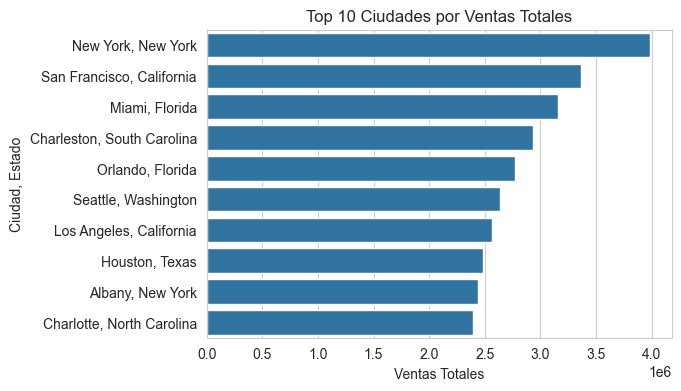

In [19]:
# Encontrar los 10 principales mercados (combinando Ciudad y Estado) por ventas totales
top_cities = df.groupby(['City', 'State'])['Total_Sales'].sum().nlargest(10).reset_index()

# Crear un gráfico de barras horizontales para no saturar el eje Y
sns.barplot(data=top_cities, x='Total_Sales', y=top_cities.apply(lambda row: f"{row['City']}, {row['State']}", axis=1))

plt.title('Top 10 Ciudades por Ventas Totales')
plt.xlabel('Ventas Totales')
plt.ylabel('Ciudad, Estado')
plt.show()

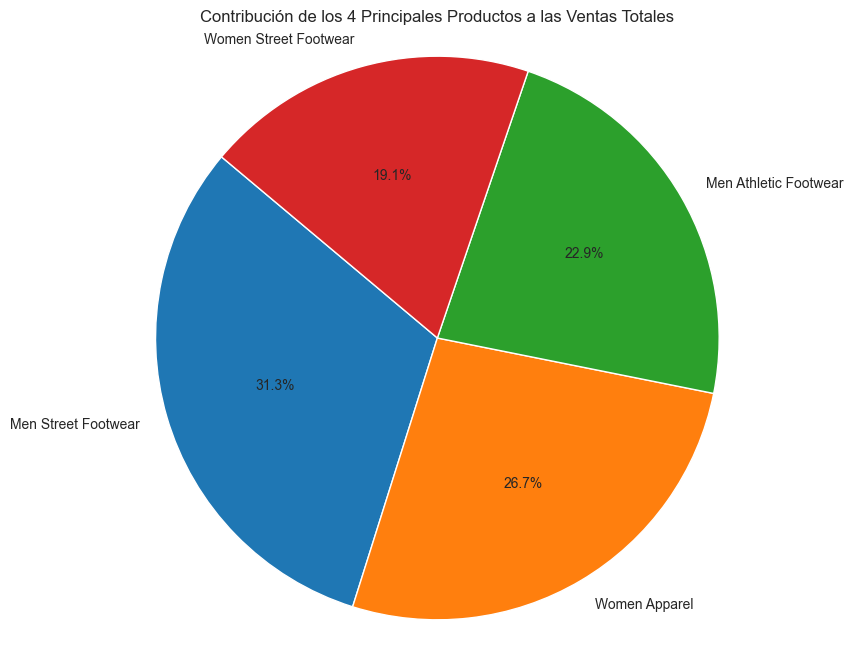

In [20]:
#Top 4 del anterior gráfico (para ser aún más específicos) 
# Agrupa los datos por producto y suma las ventas totales, seleccionando los 4 primeros
top_4_products = df.groupby('Product')['Total_Sales'].sum().nlargest(4)

# Crea el gráfico circular
plt.figure(figsize=(8, 8)) # Define el tamaño del gráfico
plt.pie(top_4_products, labels=top_4_products.index, autopct='%1.1f%%', startangle=140)

# Asegura que el círculo sea un círculo perfecto
plt.axis('equal')

# Título del gráfico
plt.title('Contribución de los 4 Principales Productos a las Ventas Totales')
plt.show()

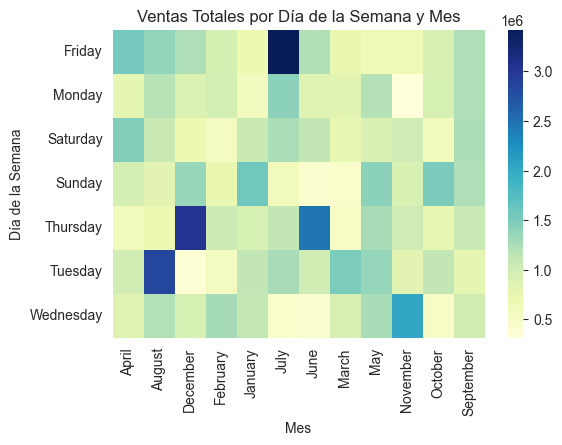

In [21]:
# ¿Cuáles son los días y meses con mayor volumen de ventas?
# Extrae el mes y el día de la semana de la fecha de la factura
df['Month_Name'] = df['Invoice_Date'].dt.month_name()
df['Day_of_Week'] = df['Invoice_Date'].dt.day_name()

# Crea un mapa de calor para ver la relación entre el día de la semana y el mes
sales_heatmap = df.pivot_table(index='Day_of_Week', columns='Month_Name', values='Total_Sales', aggfunc='sum')

sns.heatmap(sales_heatmap, cmap='YlGnBu')
plt.title('Ventas Totales por Día de la Semana y Mes')
plt.xlabel('Mes')
plt.ylabel('Día de la Semana')
plt.show()